# Continuous Function Approximater

> A single hidden layer neural network with a linear output unit can approximate any continuous function arbitrarily well, given enough hidden units.

This IPython notebook walks through the anatomy of a feed-forward neural network written in Tensorflow with (purposely) a single hidden layer, and demonstrates how well or poorly the said neural network approximates some function.

In [54]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

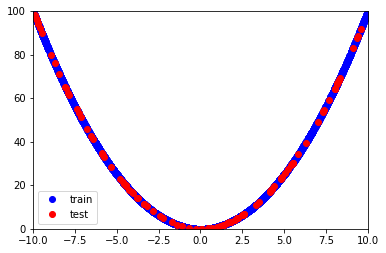

In [55]:
# Tweak the values below
n_train = 5000
n_test = 100
X_min = -10.
X_max = 10.
n_hidden_units = 200
learning_rate = 0.008
num_steps = 801

def func_to_approximate(X):
    return np.square(X)

# Sanity check
assert n_train > 0
assert n_test > 0
assert X_max > X_min

X_interval = X_max - X_min
# Generate training data
X_train = np.random.random_sample((n_train, 1)) * X_interval + X_min
y_train = func_to_approximate(X_train)
# Generate test data
X_test = np.random.random_sample((n_test, 1)) * X_interval + X_min
y_test = func_to_approximate(X_test)

# Plot training data and test data
plt.figure()
plt.axis([X_min, X_max, min(y_train), max(y_train)])
plt.plot(X_train, y_train, 'bo', label='train')
plt.plot(X_test, y_test, 'ro', label='test')
plt.legend()
plt.show()

In [56]:
X_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='X_placeholder')
y_placeholder = tf.placeholder(tf.float32, shape=(None, 1), name='y_placeholder')

h_weights = tf.Variable(
    tf.truncated_normal([1, n_hidden_units]),
    name='h_weights')
h_biases = tf.Variable(tf.zeros([n_hidden_units]),
                       name='h_biases')

out_weights = tf.Variable(
    tf.truncated_normal([n_hidden_units, 1]),
    name='out_weights')
out_biases = tf.Variable(tf.zeros([1]),
                         name='out_biases')

In [57]:
hidden = tf.nn.sigmoid(tf.matmul(X_placeholder, h_weights) + h_biases)
y = tf.matmul(hidden, out_weights) + out_biases

In [58]:
loss = tf.reduce_mean(tf.square(y - y_placeholder))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(loss)

========== Step 0 ==========
loss_train 2274.69 loss_test 954.879


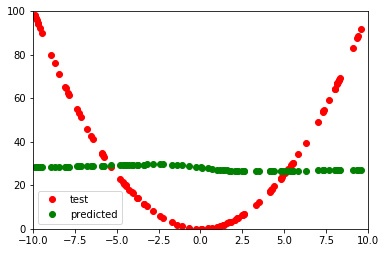

========== Step 40 ==========
loss_train 407.827 loss_test 421.787


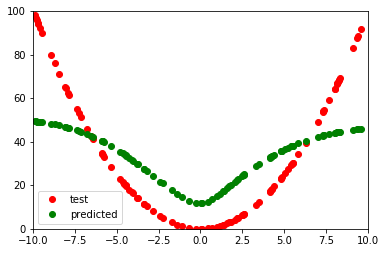

========== Step 80 ==========
loss_train 126.987 loss_test 135.671


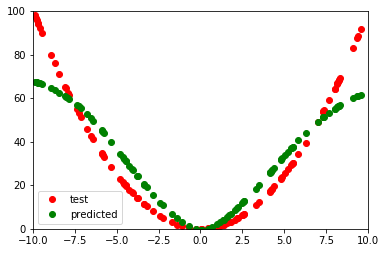

========== Step 120 ==========
loss_train 285.334 loss_test 438.347


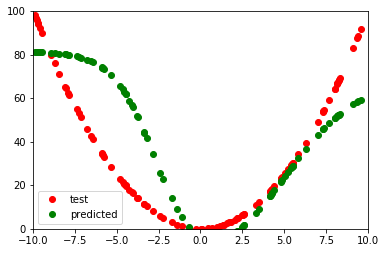

========== Step 160 ==========
loss_train 182.298 loss_test 194.701


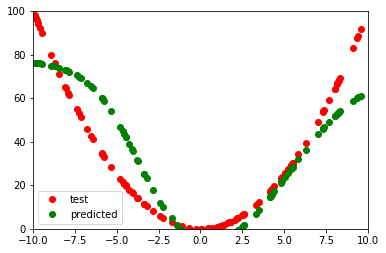

========== Step 200 ==========
loss_train 164.84 loss_test 174.104


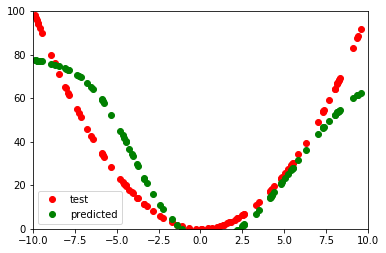

========== Step 240 ==========
loss_train 149.455 loss_test 156.138


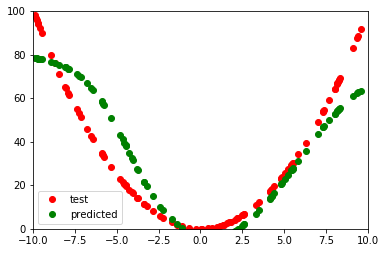

========== Step 280 ==========
loss_train 136.273 loss_test 140.87


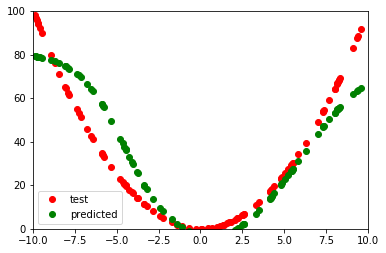

========== Step 320 ==========
loss_train 124.999 loss_test 127.949


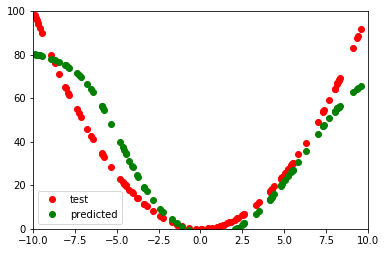

========== Step 360 ==========
loss_train 115.295 loss_test 116.968


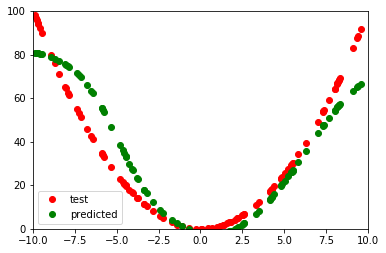

========== Step 400 ==========
loss_train 106.86 loss_test 107.553


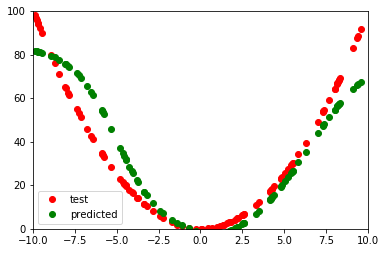

========== Step 440 ==========
loss_train 99.4755 loss_test 99.4125


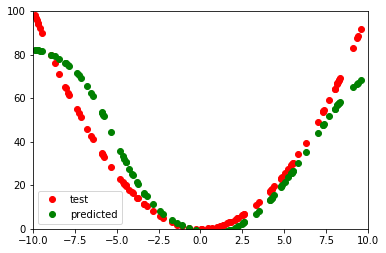

========== Step 480 ==========
loss_train 92.9743 loss_test 92.3261


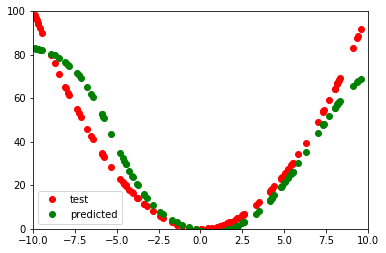

========== Step 520 ==========
loss_train 87.2157 loss_test 86.1134


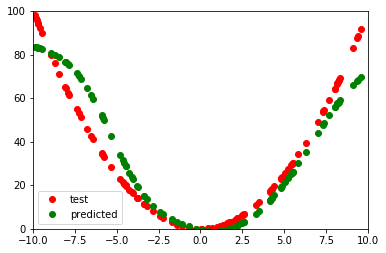

========== Step 560 ==========
loss_train 82.0853 loss_test 80.6277


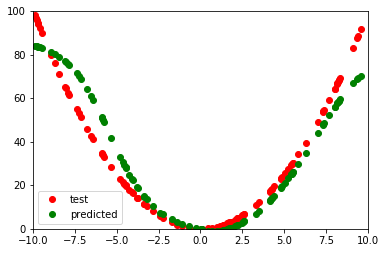

========== Step 600 ==========
loss_train 77.4927 loss_test 75.7539


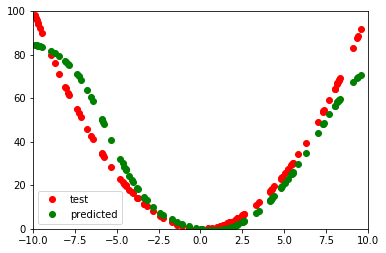

========== Step 640 ==========
loss_train 73.367 loss_test 71.4041


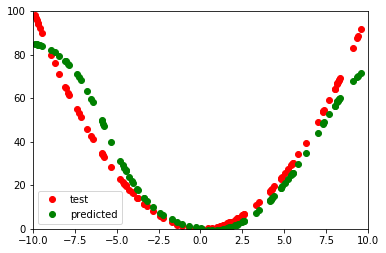

========== Step 680 ==========
loss_train 69.6444 loss_test 67.5072


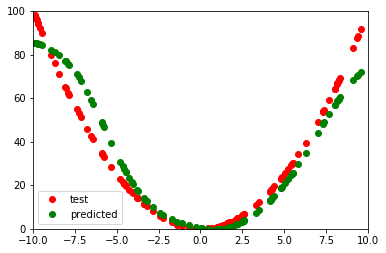

========== Step 720 ==========
loss_train 66.2667 loss_test 63.9979


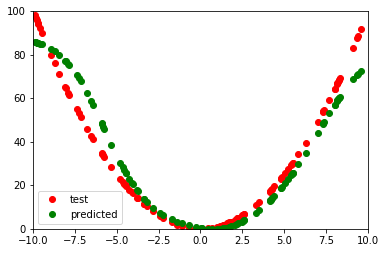

========== Step 760 ==========
loss_train 63.1851 loss_test 60.8186


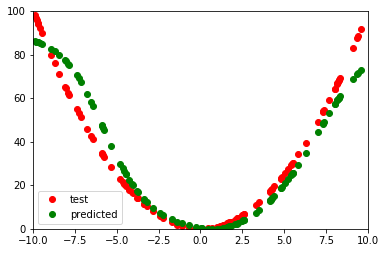

========== Step 800 ==========
loss_train 60.3606 loss_test 57.9213


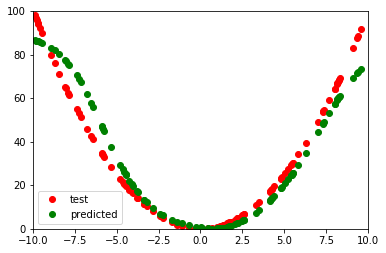

In [61]:
with tf.Session() as session:
    init = tf.global_variables_initializer()
    session.run(init)

    for step in range(num_steps):
        feed_dict_train = {X_placeholder: X_train, y_placeholder : y_train}
        _, loss_train = session.run([train, loss], feed_dict=feed_dict_train)
        
        if step % 40 == 0:
            feed_dict_test = {X_placeholder: X_test, y_placeholder : y_test}
            loss_test, y_test_predicted = session.run([loss, y], feed_dict=feed_dict_test)
            print('========== Step', step, '==========')
            print('loss_train', loss_train, 'loss_test', loss_test)
            plt.figure()
            plt.axis([X_min, X_max, min(y_train), max(y_train)])
            plt.plot(X_test, y_test, 'ro', label='test')
            plt.plot(X_test, y_test_predicted, 'go', label='predicted')
            plt.legend()
            plt.show()